In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('/content/trending_market_campaign_performance.csv')

In [ ]:
df.head()

,campaign_id,platform,ad_version,campaign_name,campaign_type,campaign_cost,total_revenue,click_through_rate,conversion_rate,impressions,date
0,C001,Google,A,Winter Collection,Brand Awareness,1107.11,2842.98,0.06,Low,23061,2024-01-01
1,C002,Instagram,B,Black Friday Deal,Brand Awareness,1220.07,1938.04,0.07,Low,20428,2024-01-02
2,C003,YouTube,A,Holiday Extravaganza,Brand Awareness,974.97,2410.88,0.06,Medium,19737,2024-01-03
3,C004,Google,A,Summer Sale,Product Launch,1086.79,2332.95,0.07,Medium,20172,2024-01-04
4,C005,YouTube,B,Year-End Sale,Product Launch,1022.19,2418.95,0.06,High,18660,2024-01-05


In [ ]:
df.shape

(100, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         100 non-null    object 
 1   platform            100 non-null    object 
 2   ad_version          100 non-null    object 
 3   campaign_name       100 non-null    object 
 4   campaign_type       100 non-null    object 
 5   campaign_cost       100 non-null    float64
 6   total_revenue       100 non-null    float64
 7   click_through_rate  100 non-null    float64
 8   conversion_rate     100 non-null    object 
 9   impressions         100 non-null    int64  
 10  date                100 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.7+ KB


In [ ]:
# change data types
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.describe()

,campaign_cost,total_revenue,click_through_rate,impressions,date
count,100.000000,100.000000,100.000000,100.000000,100
mean,1014.729500,2467.359200,0.055900,22205.020000,2024-02-19 12:00:00
min,805.470000,1522.840000,0.030000,18186.000000,2024-01-01 00:00:00
25%,903.062500,2111.920000,0.040000,20162.500000,2024-01-25 18:00:00
50%,1005.620000,2497.555000,0.060000,22294.500000,2024-02-19 12:00:00
75%,1116.502500,2810.982500,0.070000,24538.750000,2024-03-15 06:00:00
max,1245.000000,3198.810000,0.080000,25949.000000,2024-04-09 00:00:00
std,129.110364,443.477025,0.014777,2446.739938,NaN


# Exploratory Data Analysis

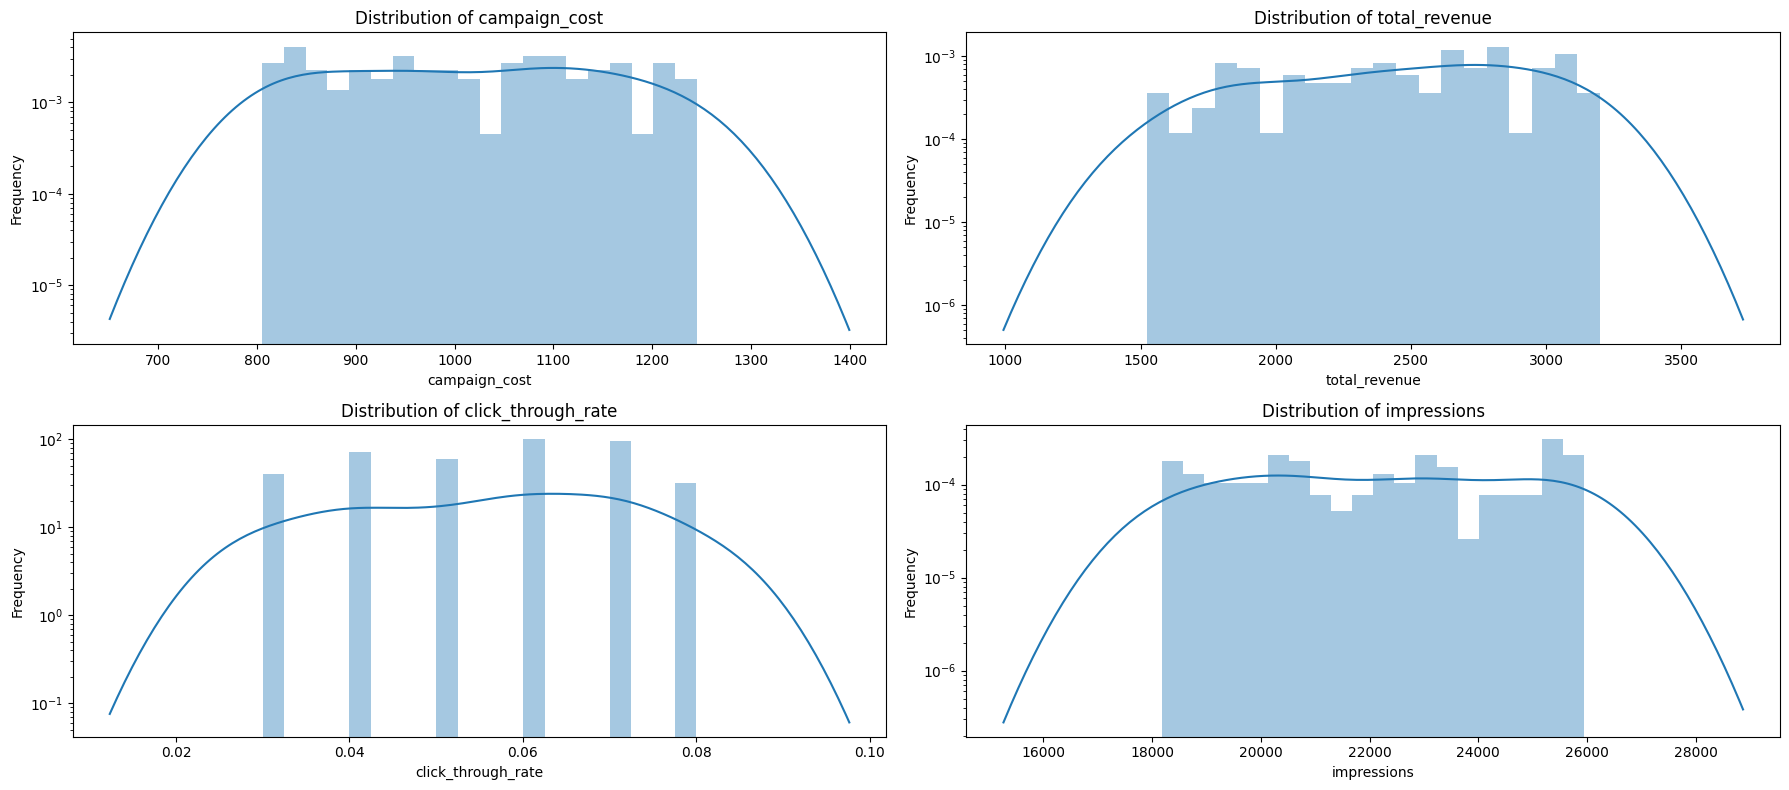

In [ ]:
plt.figure(figsize=(18,8))

num_cols = ['campaign_cost','total_revenue','click_through_rate','impressions']

for i,col in enumerate(num_cols,1):
  plt.subplot(2,2,i)
  sns.distplot(df[col],bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.yscale('log')
plt.tight_layout()
plt.show()

### Platform Comparison

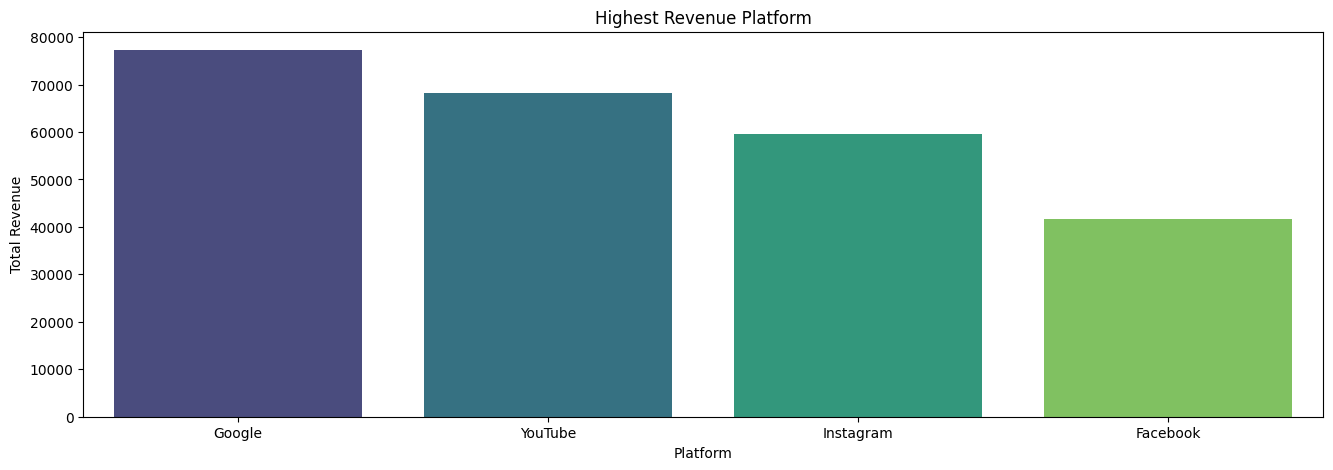

,platform,total_revenue
0,Google,77263.08
1,YouTube,68135.99
2,Instagram,59572.86
3,Facebook,41763.99


In [ ]:
highest_revenue_platform = df.groupby('platform')['total_revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,5))

sns.barplot(x='platform',y='total_revenue',data=highest_revenue_platform, palette='viridis')
plt.title('Highest Revenue Platform')
plt.xlabel('Platform')
plt.ylabel('Total Revenue')
plt.show()

highest_revenue_platform

### Cost-Effectiveness

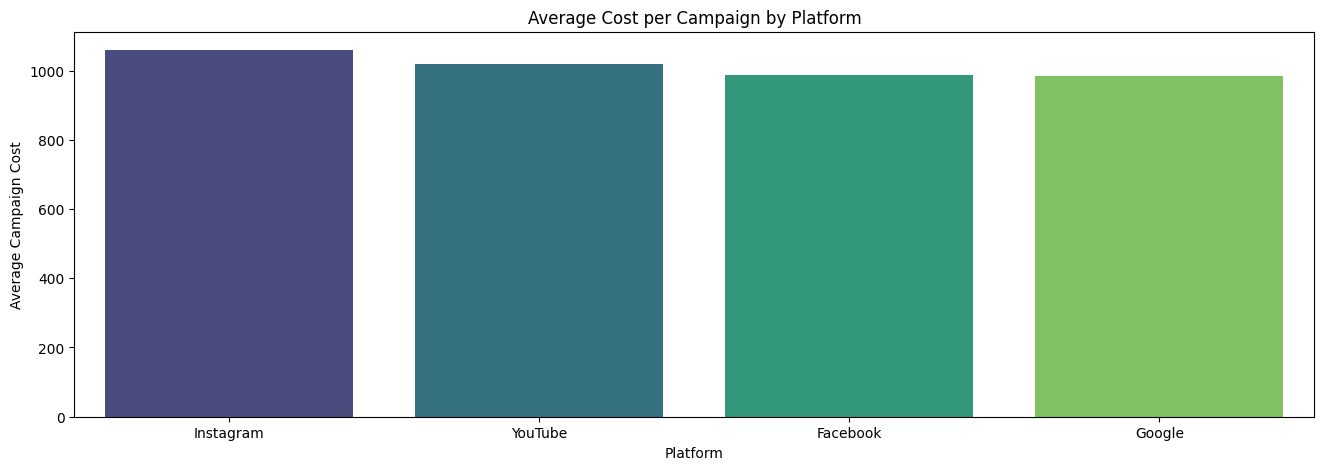

,platform,campaign_cost
0,Instagram,1059.154231
1,YouTube,1019.848966
2,Facebook,987.320625
3,Google,984.903103


In [ ]:
avg_cost_per_campaign = df.groupby('platform')['campaign_cost'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='platform', y='campaign_cost', data=avg_cost_per_campaign, palette='viridis')
plt.title('Average Cost per Campaign by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Campaign Cost')
plt.show()

avg_cost_per_campaign

### Return on Investment (ROI):

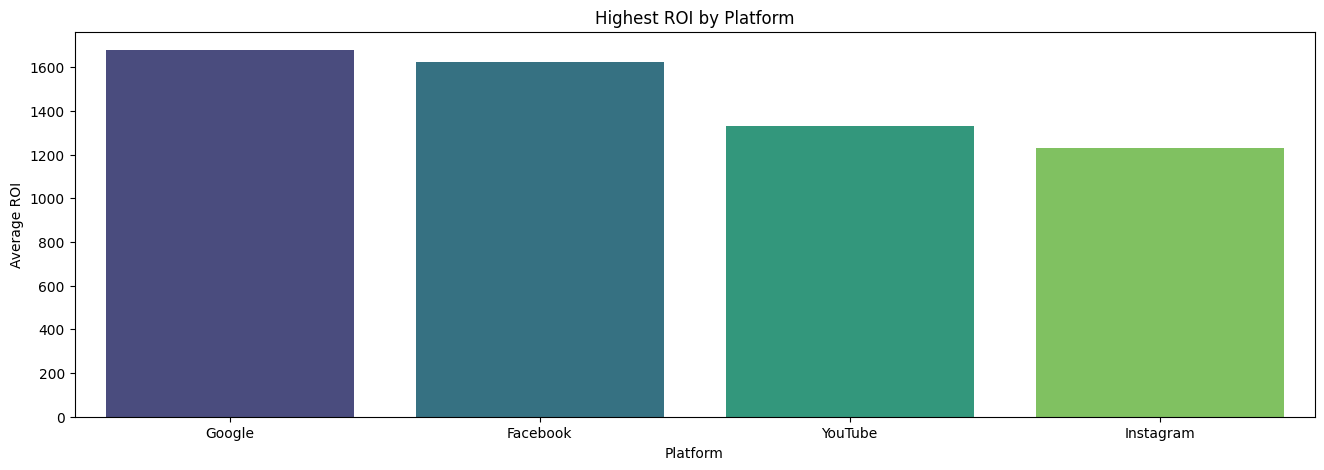

,platform,roi
0,Google,1679.341034
1,Facebook,1622.928750
2,YouTube,1329.667931
3,Instagram,1232.109615


In [ ]:
#return on investment (ROI)

df['roi'] = df['total_revenue'] - df['campaign_cost']
highest_roi_platform = df.groupby('platform')['roi'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='platform', y='roi', data=highest_roi_platform, palette='viridis')
plt.title('Highest ROI by Platform')
plt.xlabel('Platform')
plt.ylabel('Average ROI')
plt.show()

highest_roi_platform

### Conversion Rate Analysis

In [ ]:
df['conversion_rate'] = df['conversion_rate'].replace({'Low': 0.01, 'Medium': 0.05, 'High': 0.1})
df['conversion_rate_numeric'] = pd.to_numeric(df['conversion_rate'], errors='coerce')

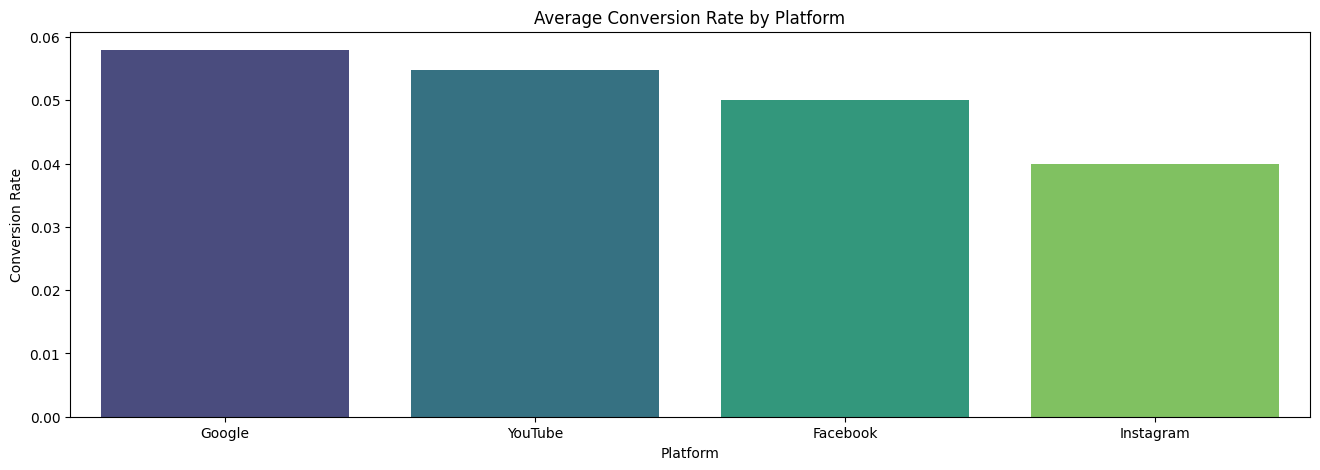

,platform,conversion_rate
0,Google,0.057931
1,YouTube,0.054828
2,Facebook,0.050000
3,Instagram,0.040000


In [ ]:
platform_conversion_rate = df.groupby('platform')['conversion_rate'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(16, 5))
sns.barplot(x='platform', y='conversion_rate', data=platform_conversion_rate, palette='viridis')
plt.title('Average Conversion Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate')
plt.show()

platform_conversion_rate

In [ ]:
correlation = df[['click_through_rate', 'conversion_rate']].corr()
print(correlation)

                    click_through_rate  conversion_rate
click_through_rate            1.000000        -0.178621
conversion_rate              -0.178621         1.000000


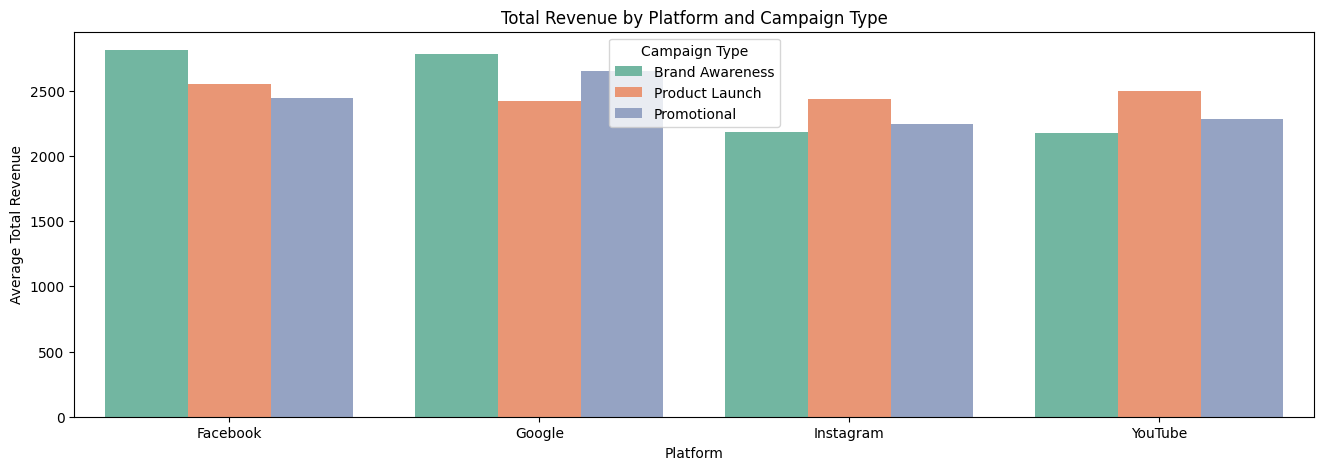

,platform,campaign_type,total_revenue
0,Facebook,Brand Awareness,2812.223333
1,Facebook,Product Launch,2554.797500
2,Facebook,Promotional,2445.243333
3,Google,Brand Awareness,2781.482000
4,Google,Product Launch,2424.924286
5,Google,Promotional,2652.340000
6,Instagram,Brand Awareness,2183.414000
7,Instagram,Product Launch,2435.571250
8,Instagram,Promotional,2243.940000
9,YouTube,Brand Awareness,2172.568750


In [ ]:
platform_campaign_revenue = df.groupby(['platform', 'campaign_type'])['total_revenue'].mean().reset_index()

plt.figure(figsize=(16, 5))
sns.barplot(x='platform', y='total_revenue', hue='campaign_type', data=platform_campaign_revenue, palette='Set2')
plt.title('Total Revenue by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Average Total Revenue')
plt.legend(title='Campaign Type')
plt.show()

platform_campaign_revenue

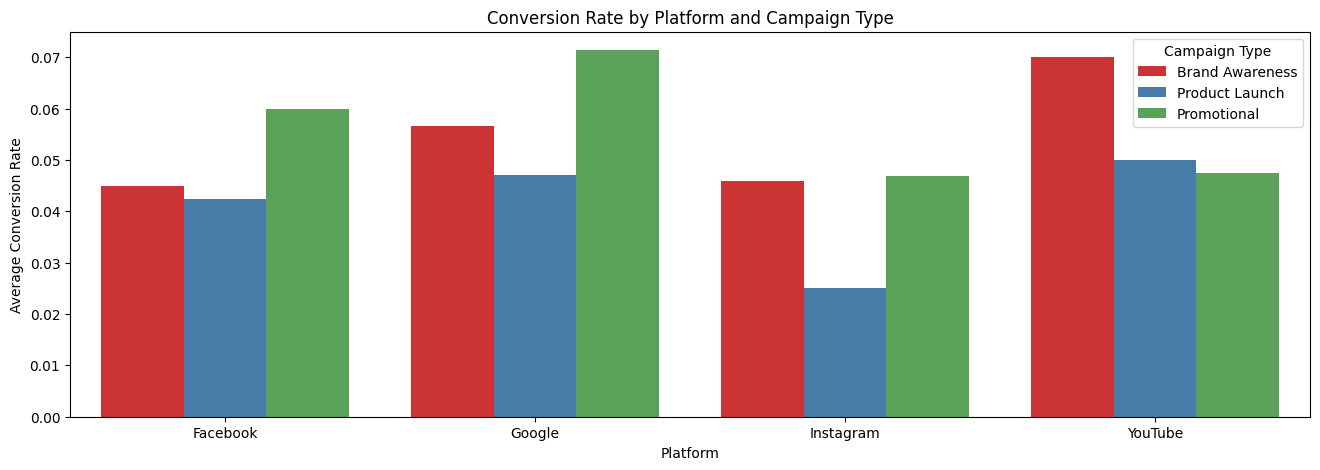

,platform,campaign_type,conversion_rate
0,Facebook,Brand Awareness,0.045000
1,Facebook,Product Launch,0.042500
2,Facebook,Promotional,0.060000
3,Google,Brand Awareness,0.056667
4,Google,Product Launch,0.047143
5,Google,Promotional,0.071429
6,Instagram,Brand Awareness,0.046000
7,Instagram,Product Launch,0.025000
8,Instagram,Promotional,0.046923
9,YouTube,Brand Awareness,0.070000


In [ ]:
platform_campaign_conversion = df.groupby(['platform', 'campaign_type'])['conversion_rate'].mean().reset_index()

plt.figure(figsize=(16, 5))
sns.barplot(x='platform', y='conversion_rate', hue='campaign_type', data=platform_campaign_conversion, palette='Set1')
plt.title('Conversion Rate by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Campaign Type')
plt.show()

platform_campaign_conversion

# Time-Based Analysis

<Figure size 1600x400 with 0 Axes>

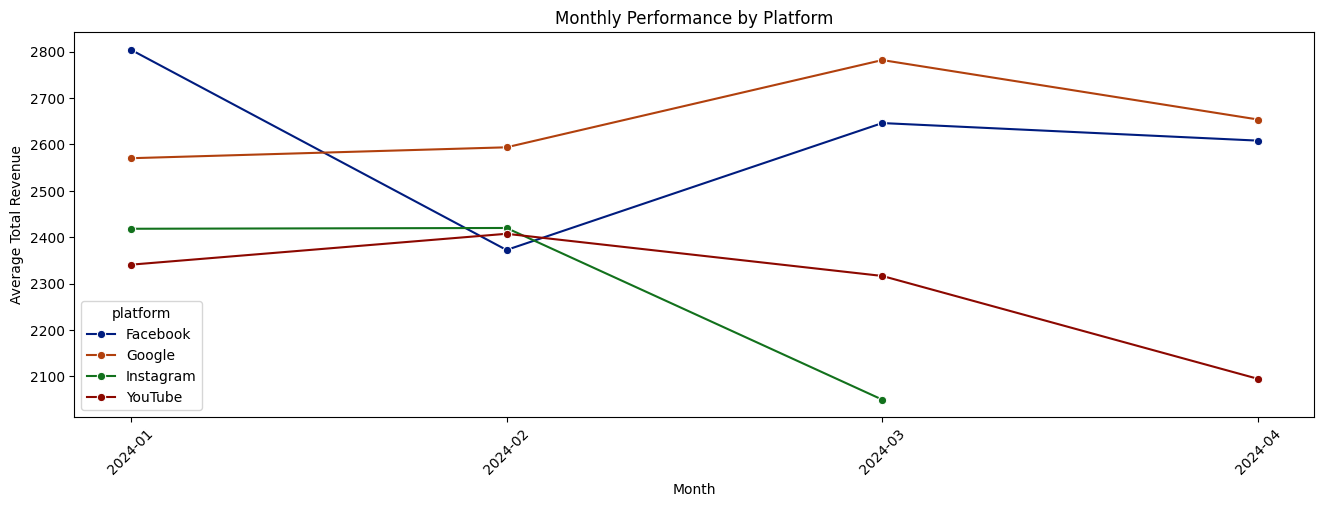

In [ ]:
plt.figure(figsize=(16,4))

df['month'] = df['date'].dt.to_period('M').astype(str)
monthly_performance = df.groupby(['platform', 'month'])['total_revenue'].mean().reset_index()

# Plot the average total revenue over time for each platform
plt.figure(figsize=(16, 5))
sns.lineplot(x='month', y='total_revenue', hue='platform', data=monthly_performance, marker='o', palette='dark')
plt.title('Monthly Performance by Platform')
plt.xlabel('Month')
plt.ylabel('Average Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Campaign Type and Platform

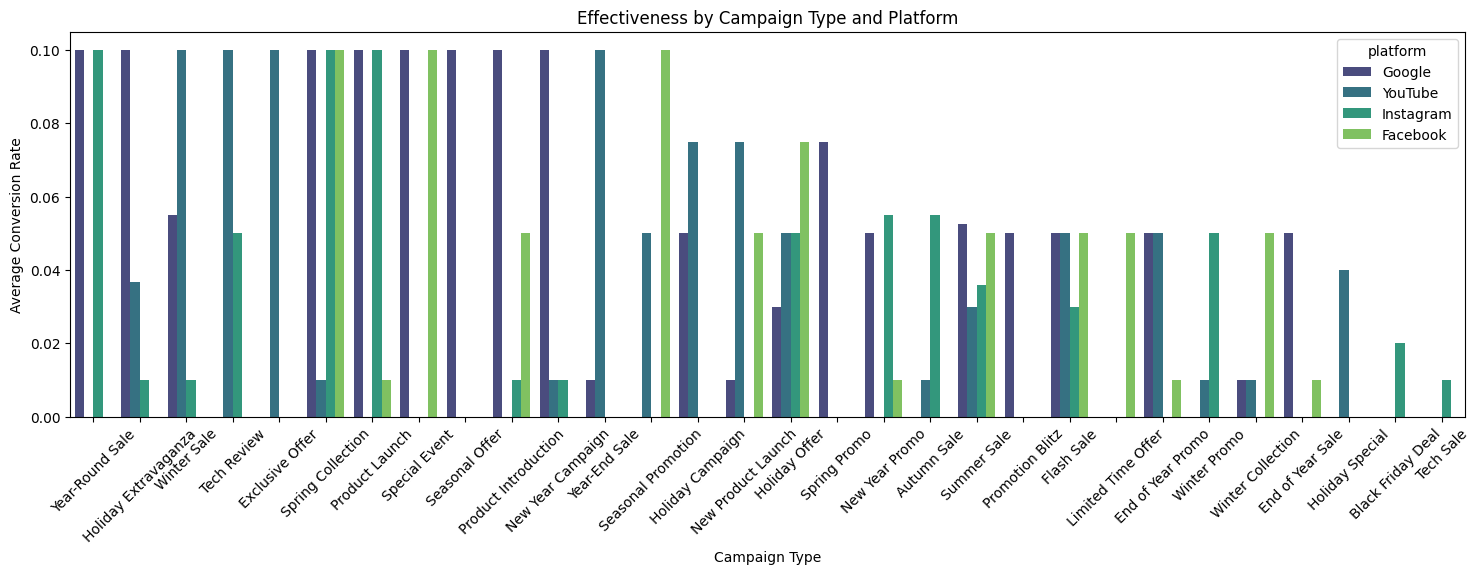

,platform,campaign_name,conversion_rate_numeric
0,Google,Year-Round Sale,0.10
1,Google,Holiday Extravaganza,0.10
2,YouTube,Winter Sale,0.10
3,YouTube,Tech Review,0.10
4,YouTube,Exclusive Offer,0.10
...,...,...,...
64,Google,Year-End Sale,0.01
65,Google,Winter Collection,0.01
66,Facebook,Product Launch,0.01
67,Google,New Product Launch,0.01


In [ ]:
effective_platform_campaign = df.groupby(['platform', 'campaign_name'])['conversion_rate_numeric'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18, 5))
sns.barplot(x='campaign_name', y='conversion_rate_numeric', hue='platform', data=effective_platform_campaign, palette='viridis')
plt.title('Effectiveness by Campaign Type and Platform')
plt.xlabel('Campaign Type')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.show()

effective_platform_campaign

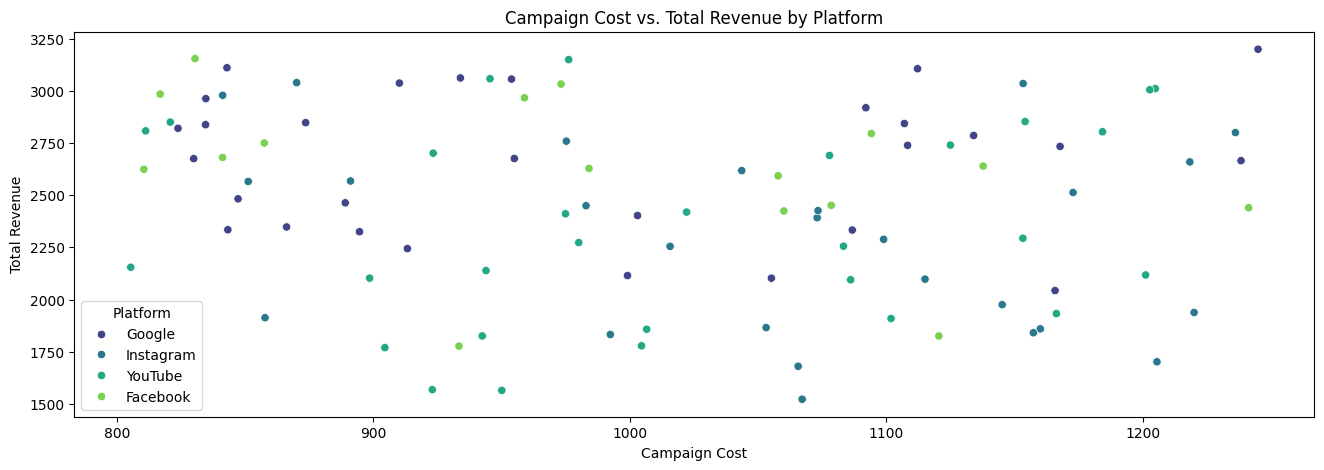

In [ ]:
plt.figure(figsize=(16, 5))
sns.scatterplot(data=df, x='campaign_cost', y='total_revenue', hue='platform', palette='viridis')
plt.title('Campaign Cost vs. Total Revenue by Platform')
plt.xlabel('Campaign Cost')
plt.ylabel('Total Revenue')
plt.legend(title='Platform')
plt.show()

### Revenue Analysis

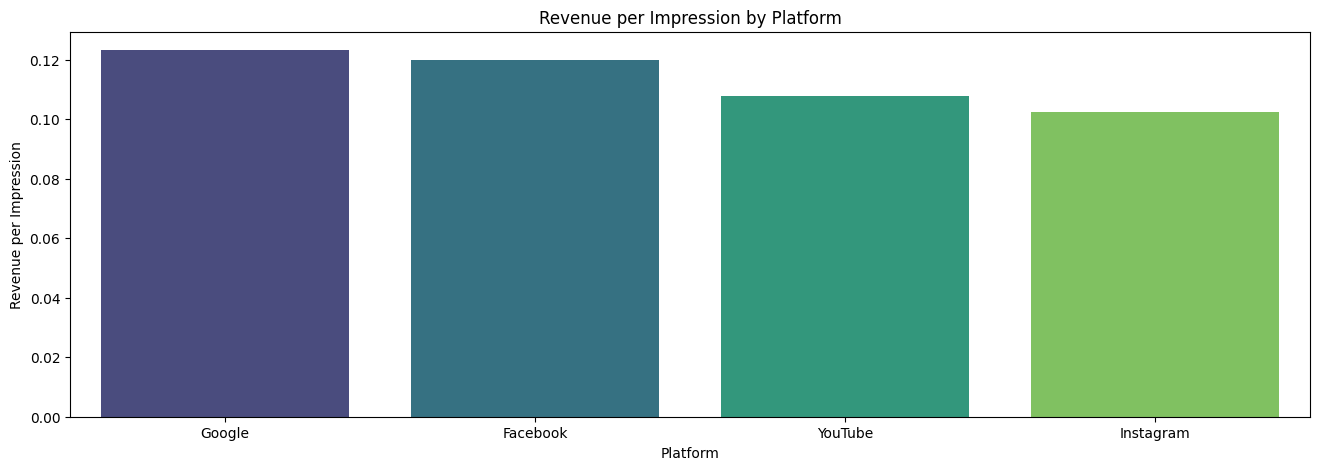

,platform,revenue_per_impression
0,Google,0.123291
1,Facebook,0.119829
2,YouTube,0.107873
3,Instagram,0.102317


In [ ]:
df['revenue_per_impression'] = df['total_revenue'] / df['impressions']
revenue_per_impression_by_platform = df.groupby('platform')['revenue_per_impression'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(16, 5))
sns.barplot(x='platform', y='revenue_per_impression', data=revenue_per_impression_by_platform, palette='viridis')
plt.title('Revenue per Impression by Platform')
plt.xlabel('Platform')
plt.ylabel('Revenue per Impression')
plt.show()

revenue_per_impression_by_platform

In [ ]:
df.head()

,campaign_id,platform,ad_version,campaign_name,campaign_type,campaign_cost,total_revenue,click_through_rate,conversion_rate,impressions,date,roi,conversion_rate_numeric,month,revenue_per_impression
0,C001,Google,A,Winter Collection,Brand Awareness,1107.11,2842.98,0.06,0.01,23061,2024-01-01,1735.87,0.01,2024-01,0.123281
1,C002,Instagram,B,Black Friday Deal,Brand Awareness,1220.07,1938.04,0.07,0.01,20428,2024-01-02,717.97,0.01,2024-01,0.094872
2,C003,YouTube,A,Holiday Extravaganza,Brand Awareness,974.97,2410.88,0.06,0.05,19737,2024-01-03,1435.91,0.05,2024-01,0.122150
3,C004,Google,A,Summer Sale,Product Launch,1086.79,2332.95,0.07,0.05,20172,2024-01-04,1246.16,0.05,2024-01,0.115653
4,C005,YouTube,B,Year-End Sale,Product Launch,1022.19,2418.95,0.06,0.10,18660,2024-01-05,1396.76,0.10,2024-01,0.129633


# Hypotheses
For each metric:

Null Hypothesis (H0): There is no significant difference between the ad versions.

Alternative Hypothesis (H1): There is a significant difference between the ad versions.


In [ ]:
from scipy.stats import ttest_ind

# Two-sample t-test for Click Through Rate
group_a = df[df['platform'] == 'Facebook']['click_through_rate']
group_b = df[df['platform'] == 'Google']['click_through_rate']

t_stat, p_value = ttest_ind(group_a, group_b)
print("Click Through Rate:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


Click Through Rate:
t-statistic: 0.7460864317325906
p-value: 0.45967478262021033


In [ ]:
# Two-sample t-test for Conversion Rate
group_a = df[df['ad_version']== 'A']['conversion_rate']
group_b = df[df['ad_version']== 'B']['conversion_rate']
t_stat, p_value = ttest_ind(group_a, group_b)
print("nConversion Rate:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

nConversion Rate:
t-statistic: -0.9730662257877886
p-value: 0.33291608828327623


In [ ]:
# wo-sample t-test for Total Revenue
group_a = df[df['ad_version']== 'A']['total_revenue']
group_b = df[df['ad_version']== 'B']['total_revenue']
t_stat, p_value = ttest_ind(group_a, group_b)
print("Total Revenue:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Total Revenue:
t-statistic: -0.35924714955275305
p-value: 0.7201830980969994


# Conclusion

After thoroughly analyzing the marketing campaign data and performing A/B testing, several key insights have emerged that can guide strategic decision-making:

1. Platform Performance:

*   Google consistently delivers the highest revenue per impression, followed closely by Facebook. This indicates that campaigns on these platforms are more effective in generating revenue relative to their reach.
*   YouTube also performs well, with a strong ROI, suggesting it’s a cost-effective platform for running campaigns.

2. Impact of Ad Versions (A/B Testing):

*   A/B Testing was conducted to compare the performance of Ad Versions A and B across several key metrics, including Click Through Rate (CTR), Conversion Rate, and Total Revenue.

*   The results showed no statistically significant differences between the two ad versions for any of these metrics. This indicates that changing the ad version does not lead to a meaningful impact on campaign performance.
*   Given the absence of significant differences, it may be more effective to focus on optimizing other factors, such as platform selection, rather than investing resources in testing different ad versions.

3. Return on Investment (ROI):

*   ROI analysis indicates that campaigns on Google and YouTube tend to yield higher returns compared to other platforms, making them prime choices for investment.
*   Careful management of campaign costs while maximizing revenue is crucial, particularly when choosing platforms that offer the best balance between reach and revenue generation.

## Strategic Recommendations:


*   Prioritize Platforms: Focus future marketing efforts on Google and YouTube to leverage their high ROI and revenue per impression metrics.
*   Optimize Ad Spending: Since A/B testing reveals no significant difference between ad versions, it would be more beneficial to optimize spending by choosing the right platforms and fine-tuning campaign parameters.

*   Continue A/B Testing: Although no significant differences were found in this analysis, A/B testing remains a valuable tool. Continue to use it for testing other variables, such as different audience segments or campaign timings, to gain further insights.
*   These conclusions, enhanced by A/B testing, provide a clear direction for optimizing marketing strategies and maximizing the effectiveness of future campaigns.

